# Importing Libraries 

In [3]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import os
import cv2

from PIL import Image 
from tensorflow import keras 
import tensorflow.keras.layers as k 

from tqdm import tqdm
import time


# Data

In [5]:
os.environ['KERAS BACKEND'] = 'tensorflow'
np.random.seed(312)

In [6]:
from tensorflow.keras.preprocessing.image import load_img , ImageDataGenerator

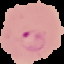

In [7]:
load_img("../Maleria_CNN/Malarial_Cell_Image_Data/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png",target_size= (64,64))

In [8]:
image_dir = "../Maleria_CNN/Malarial_Cell_Image_Data/"
size  = 64
labels =[]
dataset = []

In [9]:
parasitized_img = os.listdir(image_dir+"Parasitized/")

for i, img_name in tqdm(enumerate(tqdm(parasitized_img))):
    
    if (img_name.split(".")[1] == "png"):
        image = cv2.imread(image_dir + "Parasitized/" + img_name  )
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        labels.append(0)

 70%|████████████████████████████████████████████████████▋                      | 9677/13780 [00:06<00:02, 1516.46it/s]
9678it [00:06, 1520.20it/s]
100%|██████████████████████████████████████████████████████████████████████████| 13780/13780 [00:09<00:00, 1474.48it/s]
13780it [00:09, 1474.79it/s]


In [10]:
uninfected_img = os.listdir(image_dir+"Uninfected/")

for i, img_name in (enumerate(tqdm(uninfected_img))):
    
    if (img_name.split(".")[1] == "png"):
        image = cv2.imread(image_dir + "Uninfected/" + img_name  )
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        labels.append(1)

100%|██████████████████████████████████████████████████████████████████████████| 13780/13780 [00:08<00:00, 1619.95it/s]


In [11]:
print("number of Parasitized images :",len(parasitized_img))
print("number of Uninficted images  :",len(uninfected_img))

number of Parasitized images : 13780
number of Uninficted images  : 13780


In [12]:
print(len(dataset))
print(len(labels))

27558
27558


# Train_Test_Split

In [13]:
import sys
sys.setrecursionlimit(7000)  # or some higher number


In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split into train and test
xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(labels)), test_size=0.2, random_state=0)

# # Convert labels to categorical
# ytrain = to_categorical(np.array(ytrain))
# ytest = to_categorical(np.array(ytest))

# CNN MODEL Architecture

In [17]:
INPUT_SHAPE = (size, size, 3)

inp = k.Input(shape= INPUT_SHAPE)

conv1 = k.Conv2D(32, kernel_size=(3,3), activation= 'relu', padding= 'same')(inp)
pool1 = k.MaxPool2D(pool_size= (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1) 

conv2 = k.Conv2D(32, kernel_size=(3,3), activation= 'relu', padding= 'same')(drop1)
pool2 = k.MaxPool2D(pool_size= (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2) 

flat = k.Flatten()(drop2)

hidden1 = k.Dense(512, activation= 'relu')(flat)
norm3 = k.BatchNormalization(axis= -1)(hidden1)
drop3 = k.Dropout(rate= 0.2)(norm3)

hidden2 = k.Dense(256, activation= 'relu')(drop3)
norm4 = k.BatchNormalization(axis= -1)(hidden2)
drop4 = k.Dropout(rate= 0.2)(norm4)

out = k.Dense(2, activation= "sigmoid")(drop4)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/ta

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localh

In [18]:
model_1 = keras.Model(inputs = inp, outputs= out )
model_1.compile(optimizer= 'adam', 
                loss = 'binary_crossentropy', 
                metrics=["accuracy"])
print(model_1.summary())

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device

You got 8192 features which given to Dense neural network

In [19]:
history = model_1.fit(np.array(xtrain), ytrain, 
                     batch_size= 64, verbose=1, epochs = 15, 
                     validation_split=0.1, shuffle= False)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in

Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/repli

154/311 [=============>................] - ETA: 11s - loss: 0.6278 - accuracy: 0.6961Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


243/311 [======================>.......] - ETA: 4s - loss: 0.5160 - accuracy: 0.7601Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


288/311 [==========================>...] - ETA: 1s - loss: 0.4778 - accuracy: 0.7833Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.4630 - accuracy: 0.7921Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Execu

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

119/311 [==========>...................] - ETA: 13s - loss: 0.2290 - accuracy: 0.9196Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


208/311 [===================>..........] - ETA: 7s - loss: 0.2259 - accuracy: 0.9195Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


253/311 [=======================>......] - ETA: 4s - loss: 0.2214 - accuracy: 0.9209Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


298/311 [===========================>..] - ETA: 0s - loss: 0.2205 - accuracy: 0.9220Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9217Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

135/311 [============>.................] - ETA: 12s - loss: 0.1928 - accuracy: 0.9345Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


224/311 [====================>.........] - ETA: 6s - loss: 0.1923 - accuracy: 0.9335Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


269/311 [========================>.....] - ETA: 3s - loss: 0.1912 - accuracy: 0.9333Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9337Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /jo

107/311 [=========>....................] - ETA: 14s - loss: 0.1714 - accuracy: 0.9413Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


195/311 [=================>............] - ETA: 8s - loss: 0.1705 - accuracy: 0.9389Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


240/311 [======================>.......] - ETA: 5s - loss: 0.1697 - accuracy: 0.9394Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


285/311 [==========================>...] - ETA: 1s - loss: 0.1663 - accuracy: 0.9408Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.1673 - accuracy: 0.9402Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
311/311 [==============================] - 23s 73ms/step - loss: 0.1673 - accuracy: 0.9402 - val_loss: 0.1878 - val_accuracy: 0.9383
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

167/311 [===============>..............] - ETA: 10s - loss: 0.1512 - accuracy: 0.9453Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


212/311 [===================>..........] - ETA: 7s - loss: 0.1487 - accuracy: 0.9463Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


257/311 [=======================>......] - ETA: 3s - loss: 0.1458 - accuracy: 0.9481Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


302/311 [============================>.] - ETA: 0s - loss: 0.1453 - accuracy: 0.9484Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.1452 - accuracy: 0.9486Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

139/311 [============>.................] - ETA: 12s - loss: 0.1413 - accuracy: 0.9496Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


228/311 [====================>.........] - ETA: 5s - loss: 0.1359 - accuracy: 0.9514Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


273/311 [=========================>....] - ETA: 2s - loss: 0.1322 - accuracy: 0.9532Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.1325 - accuracy: 0.9533Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

111/311 [=========>....................] - ETA: 14s - loss: 0.1174 - accuracy: 0.9602Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


199/311 [==================>...........] - ETA: 8s - loss: 0.1147 - accuracy: 0.9595Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


244/311 [======================>.......] - ETA: 4s - loss: 0.1117 - accuracy: 0.9609Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


289/311 [==========================>...] - ETA: 1s - loss: 0.1107 - accuracy: 0.9609Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9603Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
311/311 [==============================] - 23s 73ms/step - loss: 0.1120 - accuracy: 0.9603 - val_loss: 0.1626 - val_accuracy: 0.9465
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 8/15
Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
 39/311 [==>.

127/311 [===========>..................] - ETA: 13s - loss: 0.1057 - accuracy: 0.9592Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


216/311 [===================>..........] - ETA: 6s - loss: 0.1013 - accuracy: 0.9612Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


261/311 [========================>.....] - ETA: 3s - loss: 0.0984 - accuracy: 0.9623Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


306/311 [============================>.] - ETA: 0s - loss: 0.0976 - accuracy: 0.9626Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0976 - accuracy: 0.9626Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

143/311 [============>.................] - ETA: 12s - loss: 0.0836 - accuracy: 0.9684Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


232/311 [=====================>........] - ETA: 5s - loss: 0.0814 - accuracy: 0.9696Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


277/311 [=========================>....] - ETA: 2s - loss: 0.0771 - accuracy: 0.9718Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.9713Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

159/311 [==============>...............] - ETA: 11s - loss: 0.0779 - accuracy: 0.9723Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


248/311 [======================>.......] - ETA: 4s - loss: 0.0735 - accuracy: 0.9737Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


293/311 [===========================>..] - ETA: 1s - loss: 0.0740 - accuracy: 0.9740Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9736Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 11/15
Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
 43/311 [===>..........................] - ETA: 19s - loss: 0.0604 - accuracy: 0.9778Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


131/311 [===========>..................] - ETA: 12s - loss: 0.0636 - accuracy: 0.9761Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


220/311 [====================>.........] - ETA: 6s - loss: 0.0631 - accuracy: 0.9773Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


265/311 [========================>.....] - ETA: 3s - loss: 0.0616 - accuracy: 0.9777Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0626 - accuracy: 0.9773Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/

147/311 [=============>................] - ETA: 11s - loss: 0.0495 - accuracy: 0.9818Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


236/311 [=====================>........] - ETA: 5s - loss: 0.0494 - accuracy: 0.9823Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


281/311 [==========================>...] - ETA: 2s - loss: 0.0487 - accuracy: 0.9824Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0491 - accuracy: 0.9824Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

119/311 [==========>...................] - ETA: 14s - loss: 0.0494 - accuracy: 0.9808Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


207/311 [==================>...........] - ETA: 7s - loss: 0.0468 - accuracy: 0.9820Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


252/311 [=======================>......] - ETA: 4s - loss: 0.0443 - accuracy: 0.9833Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


297/311 [===========================>..] - ETA: 1s - loss: 0.0429 - accuracy: 0.9840Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0435 - accuracy: 0.9837Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

134/311 [===========>..................] - ETA: 13s - loss: 0.0355 - accuracy: 0.9887Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


223/311 [====================>.........] - ETA: 6s - loss: 0.0341 - accuracy: 0.9882Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


268/311 [========================>.....] - ETA: 3s - loss: 0.0330 - accuracy: 0.9885Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0334 - accuracy: 0.9884Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/devi

106/311 [=========>....................] - ETA: 16s - loss: 0.0320 - accuracy: 0.9870Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


194/311 [=================>............] - ETA: 9s - loss: 0.0366 - accuracy: 0.9856Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


239/311 [======================>.......] - ETA: 5s - loss: 0.0381 - accuracy: 0.9856Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


284/311 [==========================>...] - ETA: 2s - loss: 0.0375 - accuracy: 0.9858Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0


310/311 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9856Executing op __inference_train_function_1818 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
311/311 [=================

In [21]:
print(f"xtrain shape: {np.array(xtrain).shape}")
print(f"ytrain shape: {np.array(ytrain).shape}")


xtrain shape: (22046, 64, 64, 3)
ytrain shape: (22046, 2)


In [27]:
test_accuracy = model_1.evaluate(np.array(xtest), np.array(ytest))[1] * 100
print(f"test accuracy: {test_accuracy:.2f}%")


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapData

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
 54/173 [========>.....................] - ETA: 1s - loss: 0.1662 - accuracy: 0.9531Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
 58/173 [=========>....................] - ETA: 1s - loss: 0.1571 - accuracy: 0.9558Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2

Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
122/173 [====================>.........] - ETA: 0s - loss: 0.1887 - accuracy: 0.9498Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
126/173 [====================>.........] - ETA: 0s - loss: 0.1897 - accuracy: 0.9492Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2683 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2

# Visualization

In [29]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.show()

# Example usage:
# Assuming you have a `history` object from training a model
# history = model.fit(...)
# plot_history(history)

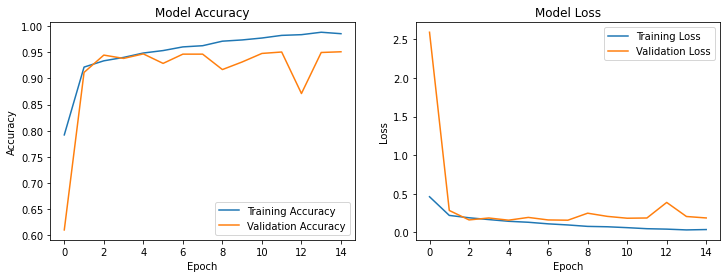

In [30]:
plot_history(history)

# Alternate Method

In [32]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

model = None
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(size, size, 3), activation='relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_las t"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(activation='relu', units=512))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Dense(activation='relu', units=256))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Dense(activation='sigmoid', units=2))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op 

Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/rep

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='tensorflow')

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17016664508234246726
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4912578560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12827173286371644703
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
]


In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


ImportError: cannot import name 'export_saved_model'

In [5]:
import tensorflow as tf
import h5py
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Found GPU at:")
    for device in physical_devices:
        print(device)
else:
    print("No GPU found")


ImportError: cannot import name 'export_saved_model'

Note: you may need to restart the kernel to use updated packages.


In [7]:
# List all available GPUs
gpu_devices = tf.config.list_physical_devices('GPU')

if gpu_devices:
    print("Available GPU devices:")
    for gpu in gpu_devices:
        print(gpu)
else:
    print("No GPU devices found")


NameError: name 'tf' is not defined